In [1]:
from fc import ptflops
from gated_resnet import resnet50
import matplotlib.pyplot as plt

net = resnet50()
flops, params, flops_model = ptflops.flops_counter.get_flops_pytorch(net, (3, 224, 224), print_per_layer_stat=False, flops_units="FLOP")

In [2]:
block_flops = []
for layer in [flops_model.__getattr__(f"layer{i}") for i in range(1, 5)]:
    for block in layer:
        block_flops.append(block.accumulate_flops())
        

Text(0, 0.5, 'MAC')

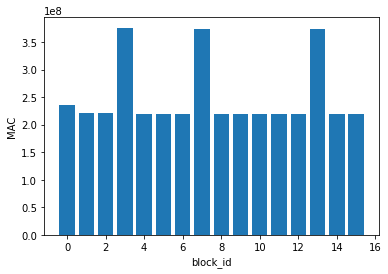

In [3]:
plt.bar(range(16), block_flops)
plt.xlabel("block_id")
plt.ylabel("MAC")

In [4]:
net.accumulate_flops()

4121925096

In [26]:
for i in range(16):
    print("Block", f"{i+1:3}", "MACs:", block_flops[i])

Block   1 MACs: 236429312
Block   2 MACs: 221978624
Block   3 MACs: 221978624
Block   4 MACs: 376018944
Block   5 MACs: 220172288
Block   6 MACs: 220172288
Block   7 MACs: 220172288
Block   8 MACs: 374262784
Block   9 MACs: 219269120
Block  10 MACs: 219269120
Block  11 MACs: 219269120
Block  12 MACs: 219269120
Block  13 MACs: 219269120
Block  14 MACs: 373384704
Block  15 MACs: 218817536
Block  16 MACs: 218817536


In [27]:
from math import comb

In [34]:
total_flops = flops_model.accumulate_flops()
avg_block_flops = (221978624 + 219269120 + 218817536) / 3

combs_flops = []

num_blocks = 16
for num_blocks_to_skip in range(num_blocks):
    comb_flops = total_flops - num_blocks_to_skip * avg_block_flops
    combs_flops.append(comb_flops)

<BarContainer object of 16 artists>

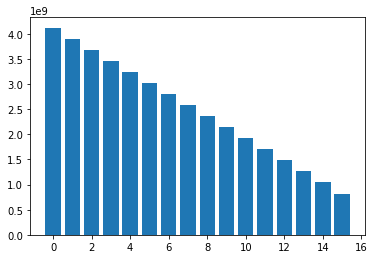

In [35]:
plt.bar(range(num_blocks), combs_flops)

In [40]:
" ".join(map(str, list(comb(16, i) for i in range(17))))

'1 16 120 560 1820 4368 8008 11440 12870 11440 8008 4368 1820 560 120 16 1'